## Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+

Компания, разрабатывающая развлекательное приложение Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки.

**Задача проекта:** разобраться в причинах убытков и помочь компании выйти в плюс.
    
**Цель исследования:**

определить

    откуда приходят пользователи и какими устройствами они пользуются,
    сколько стоит привлечение пользователей из различных рекламных каналов;
    сколько денег приносит каждый клиент,
    когда расходы на привлечение клиента окупаются,
    какие факторы мешают привлечению клиентов.

**Исходные данные:**

Данные о пользователях, привлечённые с 1 мая по 27 октября 2019 года, располагаются в трёх таблицах

    лог сервера с данными об их посещениях,
    выгрузка их покупок за этот период,
    рекламные расходы.
    
**Описание данных**

Три датасета:
1) visits - хранит лог сервера с информацией о посещениях сайта 

2) orders — информацию о заказах

3) costs — информацию о расходах на рекламу.

**Структура данных**

    visits
        User Id — уникальный идентификатор пользователя,
        Region — страна пользователя,
        Device — тип устройства пользователя,
        Channel — идентификатор источника перехода,
        Session Start — дата и время начала сессии,
        Session End — дата и время окончания сессии.
    orders
        User Id — уникальный идентификатор пользователя,
        Event Dt — дата и время покупки,
        Revenue — сумма заказа.
    costs
        dt — дата проведения рекламной кампании,
        Channel — идентификатор рекламного источника,
        costs — расходы на эту кампанию.

## Шаг 1. Загрузка и преобработка данных

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
try: 
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

In [3]:
display(visits)
visits.dtypes

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


User Id           int64
Region           object
Device           object
Channel          object
Session Start    object
Session End      object
dtype: object

In [4]:
display(orders)
orders.dtypes

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


User Id       int64
Event Dt     object
Revenue     float64
dtype: object

In [5]:
display(costs)
costs.dtypes

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


dt          object
Channel     object
costs      float64
dtype: object

In [6]:
visits.columns = [x.lower() for x in visits.columns]
visits = visits.rename(columns={'session start': 'session_start',
                                'session end': 'session_end',
                                'user id':'user_id'})
orders.columns = [x.lower() for x in orders.columns]
orders = orders.rename(columns={'user id':'user_id',
                                'event dt':'event_dt'})
costs.columns = [x.lower() for x in costs.columns]

In [7]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Дубликатов в исходных данных нет.

In [8]:
print(visits.isna().sum())
print()
print(orders.isna().sum())
print()
print(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64


Пропусков в исходных данных также не обнаружено.

In [9]:
print(visits.dtypes)
print()
print(orders.dtypes)
print()
print(costs.dtypes)

user_id           int64
region           object
device           object
channel          object
session_start    object
session_end      object
dtype: object

user_id       int64
event_dt     object
revenue     float64
dtype: object

dt          object
channel     object
costs      float64
dtype: object


In [10]:
# преобразую столбцы с датами во временной тип данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [11]:
print(visits.dtypes)
print()
print(orders.dtypes)
print()
print(costs.dtypes)

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

dt          object
channel     object
costs      float64
dtype: object


In [12]:
print(visits['session_start'].min())
print(visits['session_start'].max())

2019-05-01 00:00:41
2019-10-31 23:59:23


In [13]:
print(visits['user_id'].count())
visits[visits['session_start'] > '2019-10-27']['user_id'].count()

309901


5912

In [14]:
visits[visits['session_end'] < '2019-05-01']['user_id'].count()

0

In [15]:
duration = (visits['session_end']-visits['session_start']).dt.seconds
display(duration[duration<0].count())

0

In [16]:
print(orders['user_id'].count())
orders[orders['event_dt'] > '2019-10-27']['user_id'].count()

40212


1427

#### Промежуточный вывод

В данных дубликатов и пропусков не обнаружено, все столбцы, содежащие дату и время, приведены к нужному типу данных.

Минимальная дата первого посещения поспадает во значением в описании проекта, а вот максимальная оказалась позднее на три дня, чем в описании. Выполнив проверку, оказалось около 6 тысяч посещений были после 27 октября, а также почти полторы тысячи покупок было совершено позднее 27 октября. Но ни одна сессия не была закончина ранее 1 мая. Также ни одна сессия не имеет «отрицательной» длительности, то есть время начала всегда меньше времени конца посещения.

Можно сделать вывод, что в описании задачи немного занижено количество дней, в которые были привлечены пользователи.

### Функции для вычисления значений метрик

#### Функция для создания профилей пользователей 

In [17]:
# функция для создания профилей пользователей 
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для подсчёта Retention Rate

In [18]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта конверсии

In [19]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчёта LTV

In [20]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции для построения графиков

#### Функция для сглаживания данных

In [21]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для визуализации удержания

In [22]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()#### Функция для сглаживания данных

#### Функция для визуализации конверсии

In [23]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и POI

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика CAC пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

необходимо 


- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.


#### Пользовательские профили, горизонт анализа

In [25]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [26]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print(min_analysis_date)
print(observation_date)

2019-05-01
2019-10-27


**Промежуточный вывод**

В профилях пользователей получены идентификационные номера пользователей, время первого посещения, канал привлечения, устройство, регион, дата посещения, месяц посещения, является ли пользователь покупателем или нет, и стоимость его привлечения

Минимальная и максимальная даты привлечения совпали с датами из описания данных (1 мая 2019 и 27 октярбя 2019)

#### Анализ по странам и платежеспособности пользователей

In [27]:
payer_region = profiles.groupby('region').agg({'user_id':'nunique',
                                               'payer':'mean'}).sort_values(by='payer', 
                                                                            ascending=False)
payer_region['payer'] = payer_region['payer']*100
payer_region

,user_id,payer
region,,
United States,100002,6.901862
Germany,14981,4.111875
UK,17575,3.982930
France,17450,3.799427


**Промежуточный вывод**

Пользователи привлекаются из четырёх стран — США, Германия, Великобритания и Франция. Самая «успешная» страна и по количеству пользователей, и по доле платящих — США, здесь почти 7% платящих пользователей от общего количества

#### Анализ по устройствам и платежеспособности пользователей

In [28]:
payer_device = profiles.groupby('device').agg({'user_id':'nunique',
                                               'payer':'mean'}).sort_values(by='payer', 
                                                                            ascending=False)
payer_device['payer'] = payer_device['payer']*100
payer_device

,user_id,payer
device,,
Mac,30042,6.364423
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790


**Промежуточный вывод**

Пользователи используют четыре устройства — Mac, iPhone, Android, PC. Здесь самое «успешное» устройство — это Мас (6,3%), но он конкурирует с iPhone (6,2%). 

#### Анализ по каналам привлечения и платежеспособности пользователей

In [29]:
payer_channel = profiles.groupby('channel').agg({'user_id':'nunique',
                                               'payer':'mean'}).sort_values(by='payer', 
                                                                            ascending=False)
payer_channel['payer'] = payer_channel['payer']*100
payer_channel

,user_id,payer
channel,,
FaceBoom,29144,12.204914
AdNonSense,3880,11.340206
lambdaMediaAds,2149,10.469986
TipTop,19561,9.600736
RocketSuperAds,4448,7.913669
WahooNetBanner,8553,5.296387
YRabbit,4312,3.826531
MediaTornado,4364,3.574702
LeapBob,8553,3.063253


**Промежуточный вывод**

Каналов привлечения 11, из них самый «успешный» на платящих пользователей — это FaceBoom, на него приходится 12% платящих. 

**Вывод по исследовательскому анализу**

В профилях пользователей получены идентификационные номера пользователей, время первого посещения, канал привлечения, устройство, регион, дата посещения, месяц посещения, является ли пользователь покупателем или нет, и стоимость его привлечения.

Минимальная и максимальная даты привлечения совпали с датами из описания данных (1 мая 2019 и 27 октярбя 2019).


__страны:__ Пользователи привлекаются из четырёх стран — США, Германия, Великобритания и Франция. Самая «успешная» страна и по количеству пользователей, и по доле платящих — США, здесь почти 7% платящих пользователей от общего количества.


__устройства:__ Пользователи используют четыре устройства — Mac, iPhone, Android, PC. Здесь самое «успешное» устройство — это Мас (6,3%), но он конкурирует с iPhone (6,2%). 


__источники привлечения:__ Каналов привлечения 11, из них самый «успешный» на платящих пользователей — это FaceBoom, на него приходится 12% платящих. 

### 4. Маркетинг

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

#### 4.1. Общая сумма расходов на маркетинг

In [30]:
# общая сумма расходов на маркетинг
num = profiles['acquisition_cost'].sum()
print(f'общая сумма расходов на маркетинг {num:.0f}')

общая сумма расходов на маркетинг 105497


**Промежуточный вывод**

Общая сумма расходов на маркетинг составила 105497

#### 4.2. Затраты на рекламу по источникам

In [31]:
#### 4.1. Ощая сумма расходов на маркетинг
profiles['week'] = profiles['first_ts'].dt.isocalendar().week
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,28
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,40
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,40
...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000,39
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000,43
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000,30
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714,39


In [32]:
profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Промежуточный вывод**

Выше приведена таблица расходов по каналу привлечения, самые высокооплачевыемые источники — это TipTop и FaceBoom, organic — бесплатный источник, что логично.

#### 4.3. Динамика изменения расходов по времени по каждому источнику

In [33]:
#### 4.1. Ощая сумма расходов на маркетинг
month = profiles.groupby(['channel', 
                          'month']).agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost', 
                                                                                ascending=False)
week = profiles.groupby(['week',
                         'channel']).agg({'acquisition_cost':'sum'}).sort_values(by='acquisition_cost', 
                                                                                 ascending=False)                                                                                  
display(month)
display(week)

acquisition_cost
channel month                       
TipTop  2019-09-01           13232.5
        2019-10-01           12250.0
        2019-08-01           11202.0
        2019-07-01            8410.2
        2019-06-01            6675.6
...                              ...
organic 2019-06-01               0.0
        2019-07-01               0.0
        2019-08-01               0.0
        2019-09-01               0.0
        2019-10-01               0.0

[66 rows x 1 columns]

,,acquisition_cost
week,channel,
39,TipTop,3979.5
40,TipTop,3703.0
43,TipTop,3265.5
38,TipTop,3241.0
41,TipTop,3097.5
...,...,...
37,organic,0.0
18,organic,0.0
38,organic,0.0


In [34]:
month_pivot = month.pivot_table(index='month', columns='channel', values='acquisition_cost')
week_pivot = week.pivot_table(index='week', columns='channel', values='acquisition_cost')
display(month_pivot)
display(week_pivot)

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
month,,,,,,,,,,,
2019-05-01,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4,0.0
2019-06-01,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2,0.0
2019-07-01,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2,0.0
2019-08-01,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0,0.0
2019-09-01,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2,0.0
2019-10-01,537.60,5736.5,315.42,140.16,378.00,205.725,12250.0,942.0,163.41,213.6,0.0


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
week,,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.20,81.6,0.0
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.90,103.2,0.0
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.30,90.4,0.0
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.40,119.2,0.0
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.80,83.2,0.0
23,102.90,1081.3,66.99,27.60,79.50,76.050,1223.6,196.8,25.80,35.2,0.0
24,96.60,1042.8,52.29,29.76,71.50,63.180,1121.0,166.2,17.46,45.6,0.0
25,141.75,1280.4,68.46,32.16,79.75,80.730,1474.4,201.6,22.14,40.0,0.0
26,148.05,1647.8,99.75,40.56,107.00,78.260,2343.6,285.0,27.90,59.2,0.0


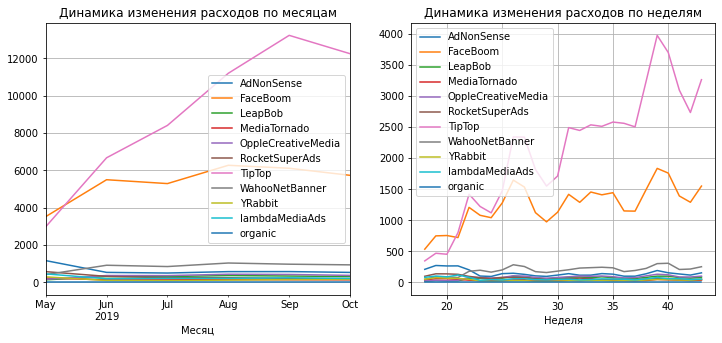

In [35]:
month_pivot.plot(grid=True, figsize=(12, 5), ax=plt.subplot(1, 2, 1))
plt.legend()
plt.xlabel('Месяц')
plt.title('Динамика изменения расходов по месяцам');
week_pivot.plot(grid=True, figsize=(12, 5), ax= plt.subplot(1, 2, 2))
plt.legend()
plt.xlabel('Неделя')
plt.title('Динамика изменения расходов по неделям');
plt.show()

**Промежуточный вывод**

По графику изменения расходов по месяцам по-прежнему в лидерах находятся TipTop(1 место) и FaceBoom(2 место), причём у TipTop самый пик приходится на сентярбрь, а у  FaceBoom — на август, а далее спад.

#### 4.4. Средний CAC на пользователя по источнику привлечения

In [36]:
cac = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost', 
                                                                               ascending=False)
cac

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [37]:
general_cac = profiles['acquisition_cost'].mean()
general_cac

print(f'общий сас по проекту {general_cac:.3f}')

общий сас по проекту 0.703


**Промежуточный вывод**

В среднем самым дорогим привлечённым пользователем считается пользователь из канала TipTop, так как его стоимость составляет 2,8, самым дешевым и бесплатным — organic

#### Общий вывод по разделу маркетинга 

Общая сумма расходов на маркетинг составила 105497

По таблице каналов привлечения самые высокооплачевыемые источники — это TipTop и FaceBoom, organic — бесплатный источник, что логично.

По графику изменения расходов по месяцам по-прежнему в лидерах находятся TipTop(1 место) и FaceBoom(2 место), причём у TipTop самый пик приходится на сентярбрь, а у  FaceBoom — на август, а далее спад.

В среднем самым дорогим привлечённым пользователем считается пользователь из канала TipTop, так как его стоимость составляет 2,8, самым дешевым и бесплатным — organic

### 5. Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, нужно проанализировать окупаемость рекламы. Можно считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определить самостоятельно.

- Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.
- Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответить на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?


In [38]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

#### 5.1. Окупаемость рекламы (в общем)

In [39]:
profiles = profiles.query('channel != "organic"')

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

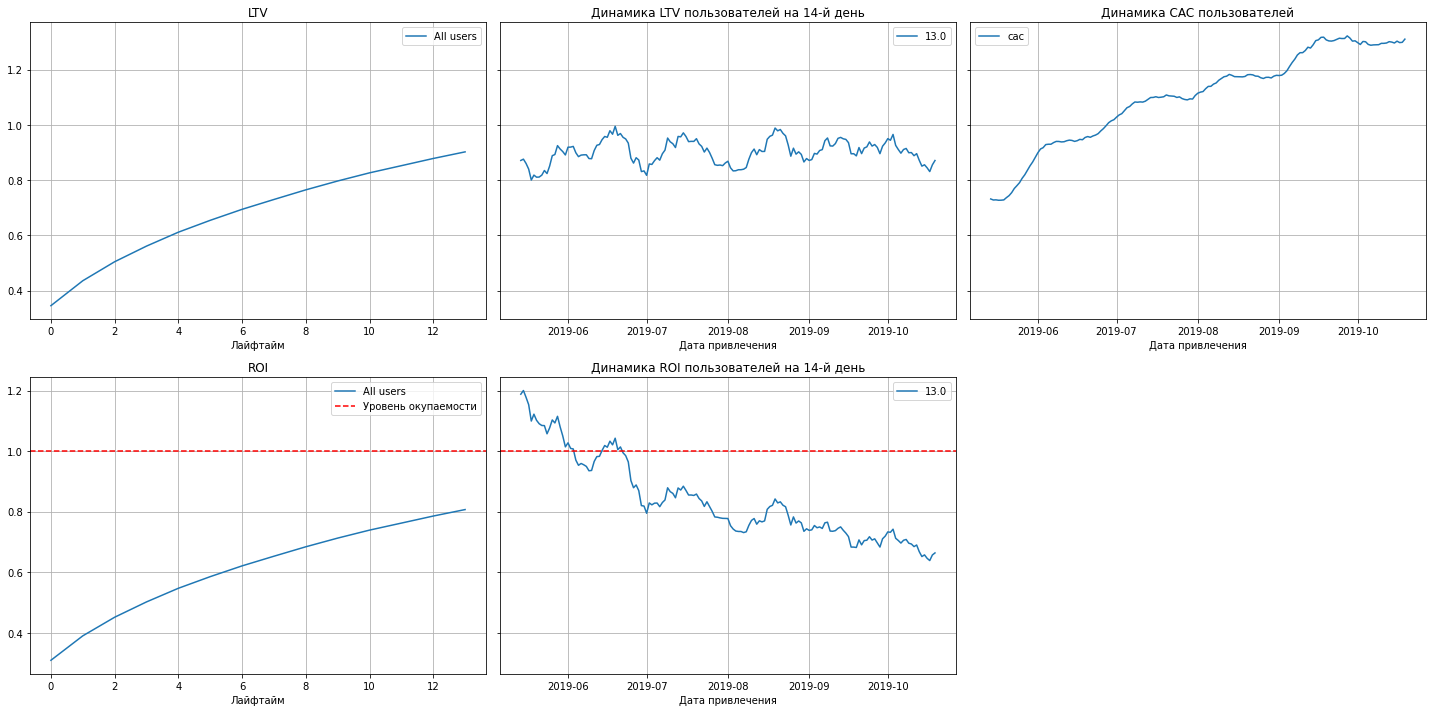

In [41]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Промежуточный вывод**

LTV стабильно растёт и имеет сезонный характер, CAC со временем растёт всё больше и больше, то есть уведичивается рекламный бюджет, но затраты на рекламу не окупаются, ROI к концу исследуемого периода не превышает 80%.

#### 5.2. Конверсия и удержание

In [42]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
)

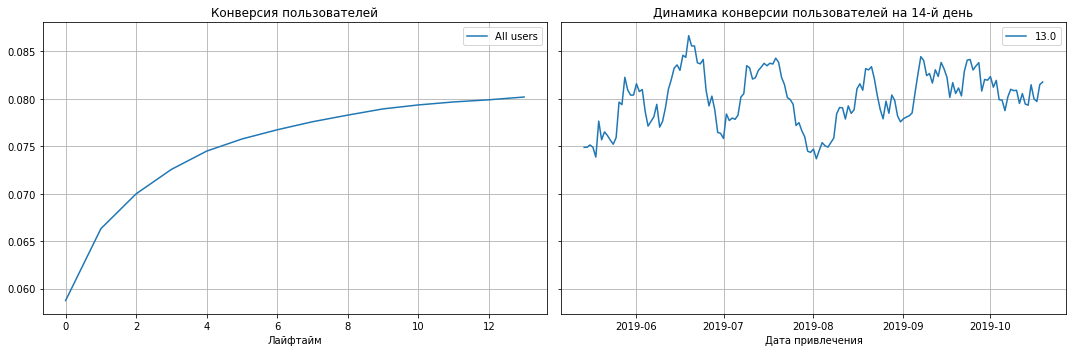

In [43]:
plot_conversion(conversion, conversion_history, 14, window=14)

In [44]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False)

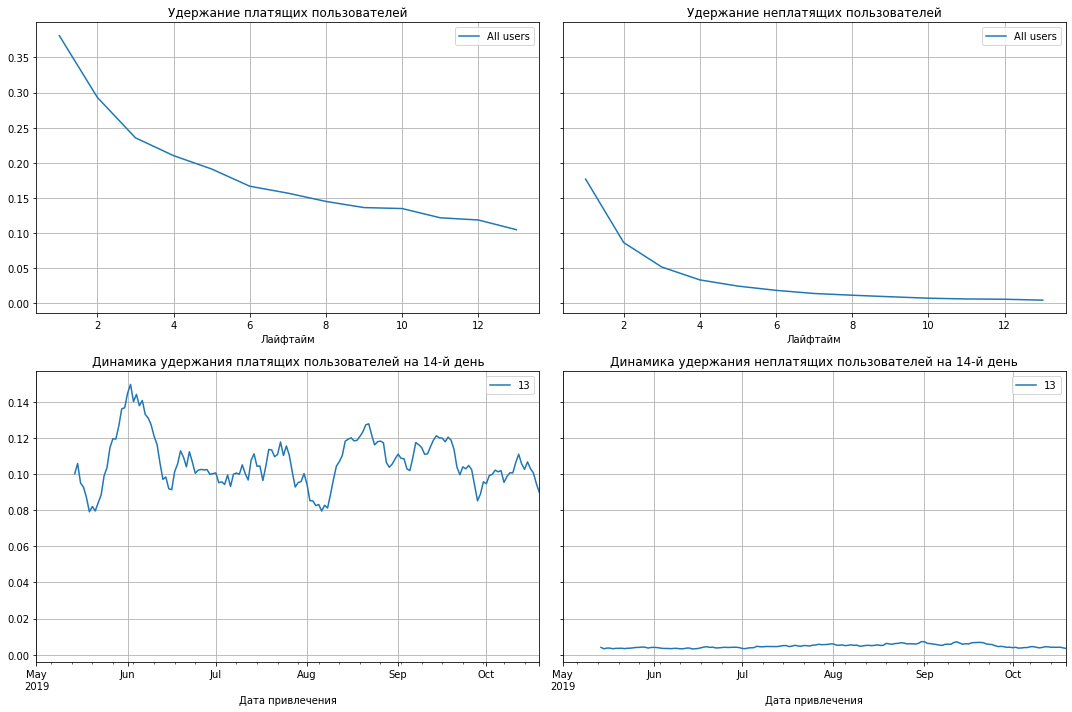

In [45]:
plot_retention(retention, retention_history, horizon_days, window=14)

**Промежуточный вывод**

Исходя из графиков conversion rate конверсия растёт (что верно), а динамика имеет сезонный характер, особых зацепок нет.
То же касается и удержания: платящие клиенты удерживаются лучше неплатящих, динамика показывает, что платящие стабильно хорошо удерживаются, в отличии от неплатящих

#### 5.3. Окупаемость с разбивкой по устройствам

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

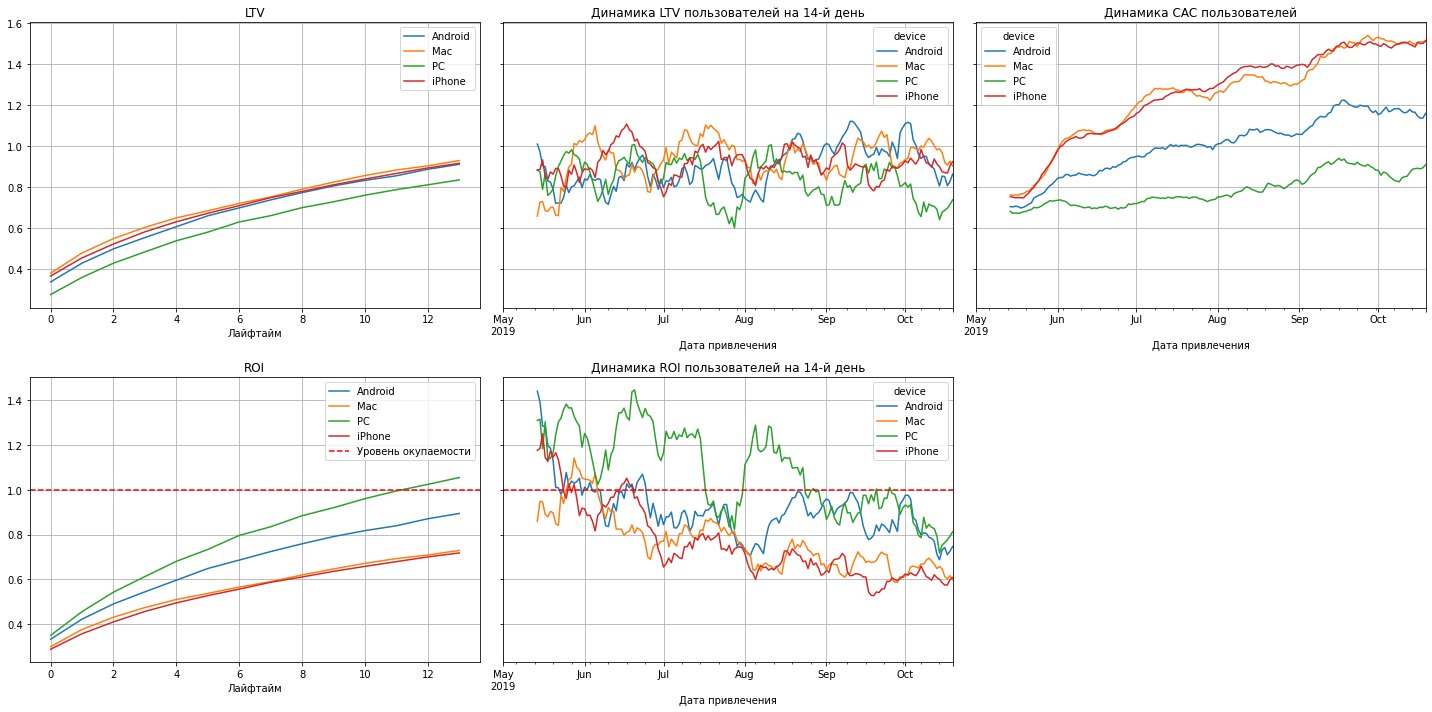

In [47]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [48]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False,
)

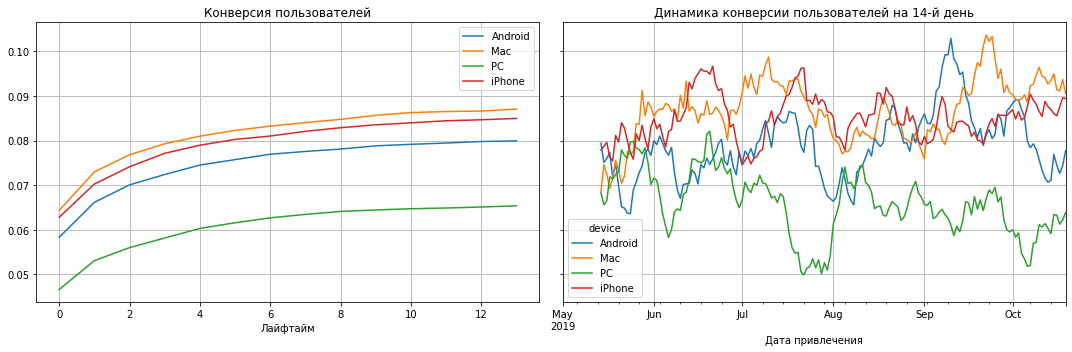

In [49]:
plot_conversion(conversion, conversion_history, 14, window=14)

In [50]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['device'],
    ignore_horizon=False)

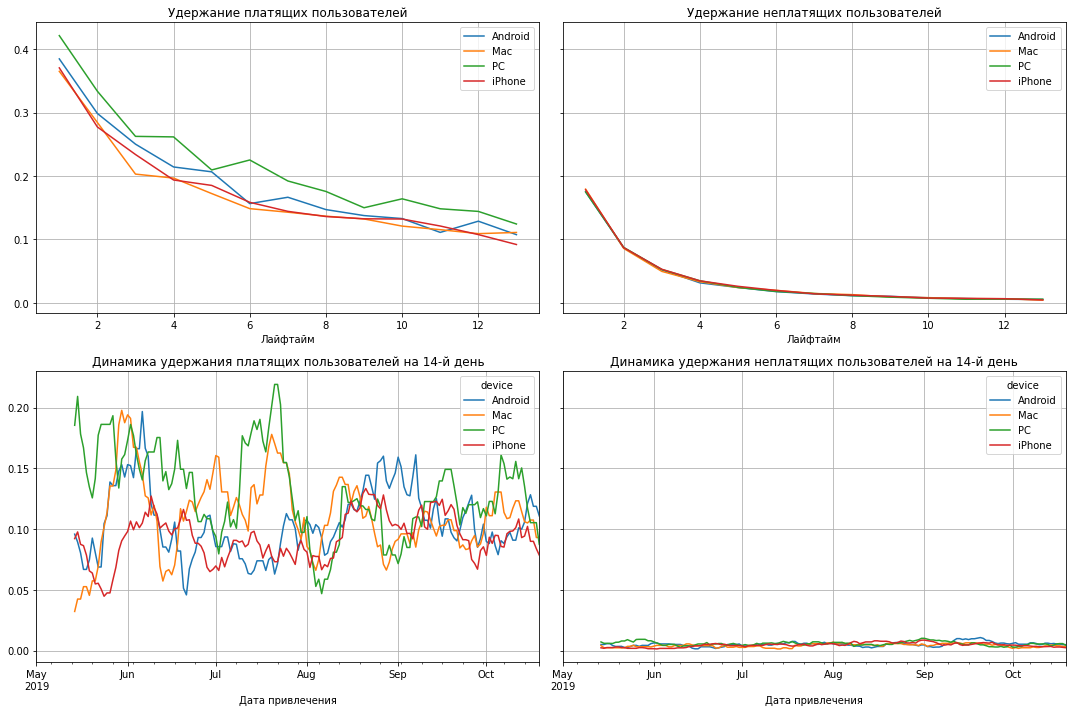

In [51]:
plot_retention(retention, retention_history, horizon_days, window=14)

**Промежуточный вывод**

Что касается LTV и CAC, здесь все в порядке, Mac и iPhone затрачивают больше всего денег на рекламу, конверсия выше всех, но удержание чуть хуже остальных и затраты здесь вовсе не окупаются.

#### 5.4. Окупаемость с разбивкой по странам

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])

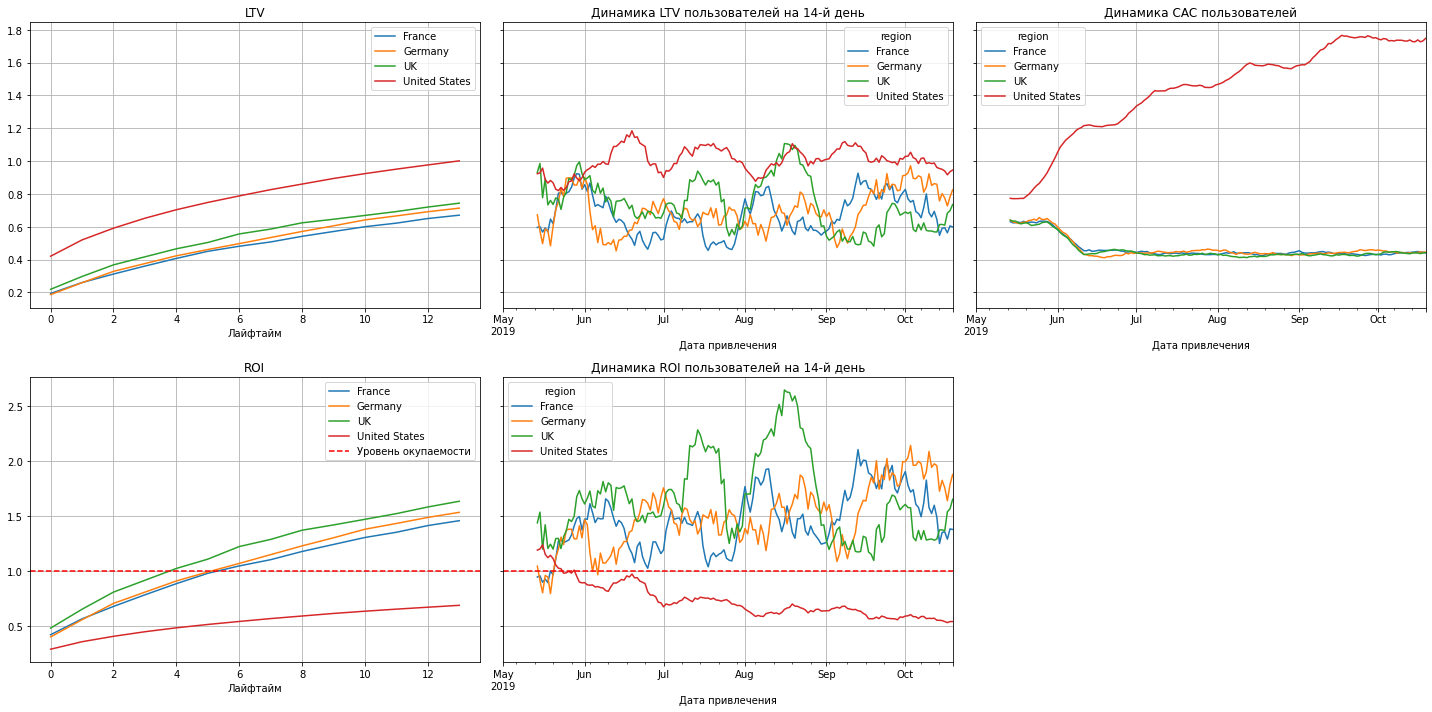

In [53]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [54]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False,
)

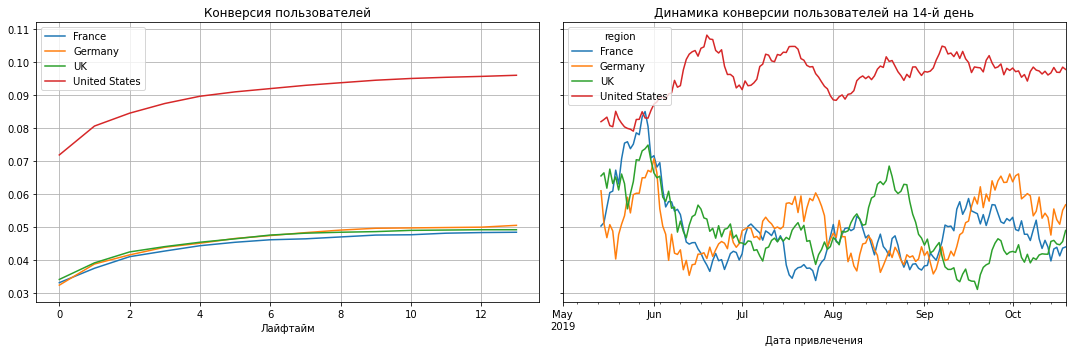

In [55]:
plot_conversion(conversion, conversion_history, 14, window=14)

In [56]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['region'],
    ignore_horizon=False)

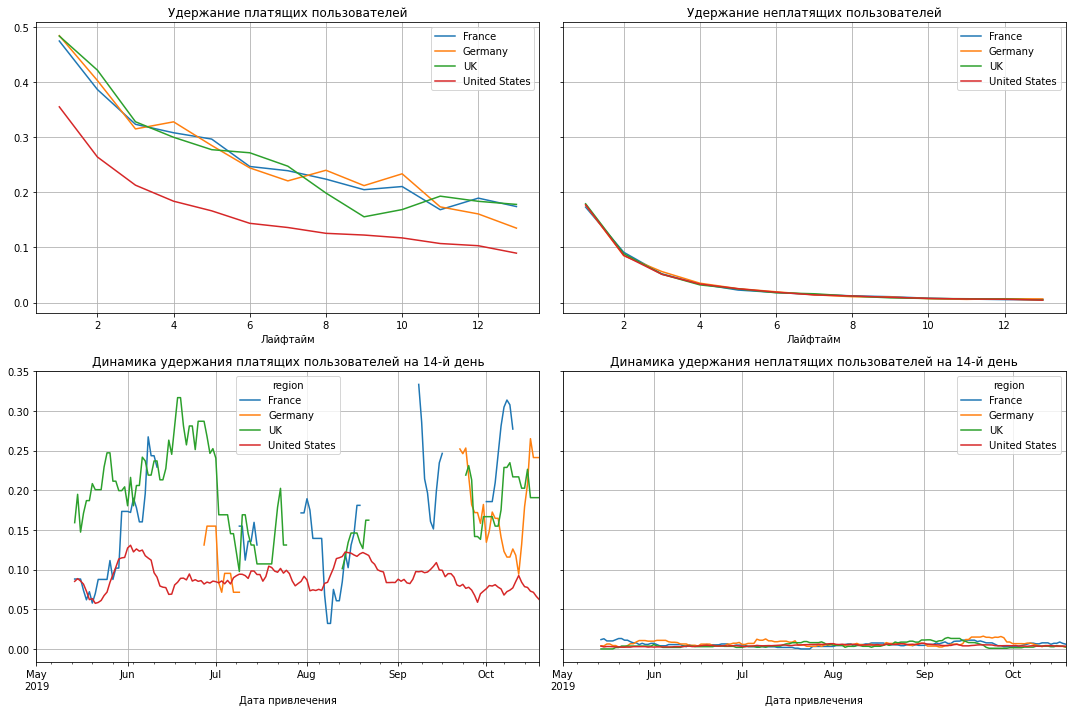

In [57]:
plot_retention(retention, retention_history, horizon_days, window=14)

**Промежуточный вывод**

Больше всего прибыли приносит США, страна характеризуется наилучшей конверсией, но наихудшее удержание и самые большие затраты находятся здесь же, затраты на рекламу не окупаются у этой страны

#### 5.5. Окупаемость с разбивкой по каналам привлечения

In [58]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])

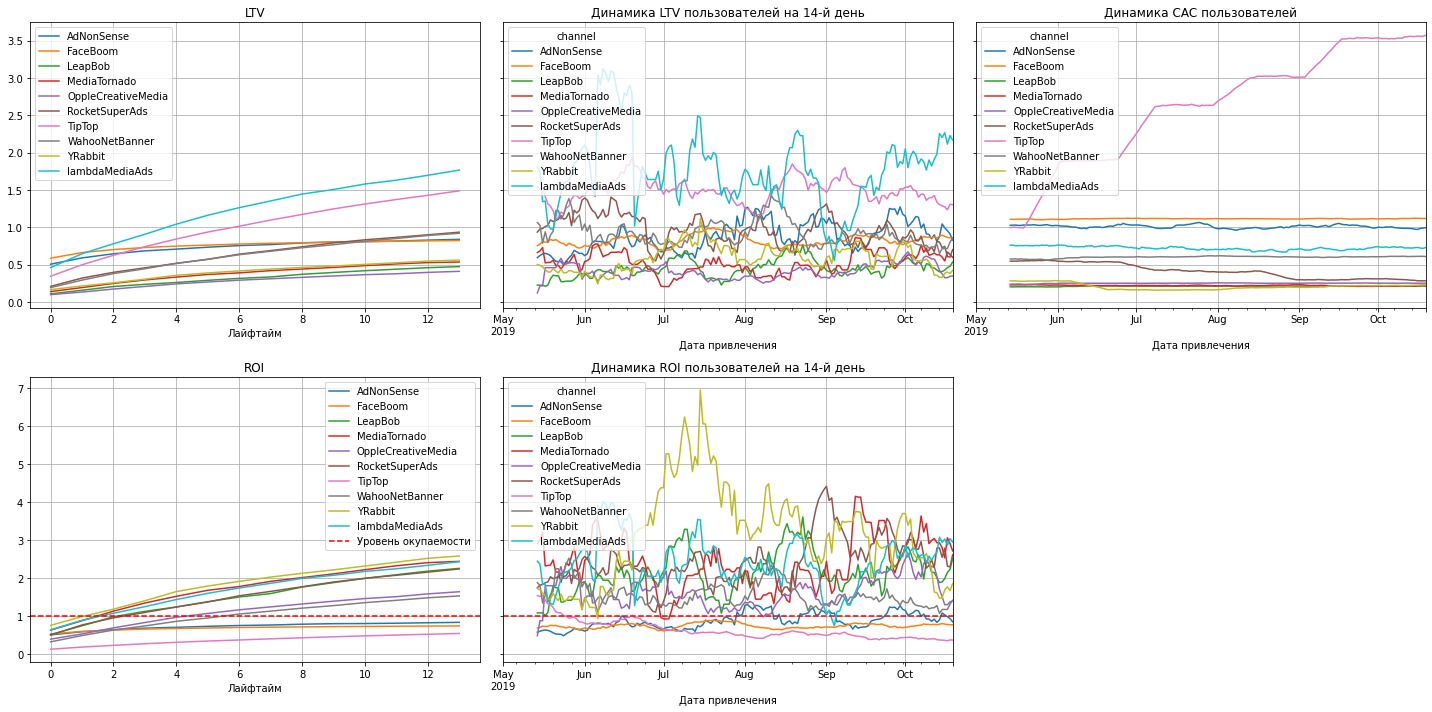

In [59]:
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [60]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False,
)

In [ ]:
plot_conversion(conversion, conversion_history, 14, window=14)

In [ ]:
retention_raw, retention, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['channel'],
    ignore_horizon=False)

In [ ]:
plot_retention(retention, retention_history, horizon_days, window=14)

**Промежуточный вывод**

По графику САС можно сделать вывод, что TipTop по-прежнему со временем увеличивает траты на привлечение, но вовсе не окупается, как и FaceBoom и AdNonSense. Зато у этих каналов довольно высокие конверсии, но FaceBoom и AdNonSense Плохо удерживают платящих пользователей.

#### 5.6. Ответы на вопросы

1. В общем затраты на рекламу не окупаются вовсе
2. Негативное влияние на это оказывают:
       * устройства: Mac и Iphone, 
       * страны: США
       * источники: TipTop и FaceBoom
3. Проблемы окупаемости могут быть вызваны тем, что, например, тем, какого возроста приходят клиенты из разных каналов, возможно какие-то каналы, например, TipTop, больше популярны у подростков, в них вкладывается больше всего затрат, но окупаемости нет, так как аудитория не сильно платежеспособная. А на устройствах Mac и Iphone (ПО США)  возможны технические проблемы, из-за которых возникают проблемы с посещением, сессии становятся короткими, но затраты на привлечения закладываются без учёта сложившихся проблем.

### Выводы по разделу окупаемости

__Бизнес-показатели без учёта группировки:__ 
LTV стабильно растёт и имеет сезонный характер, CAC со временем растёт всё больше и больше, то есть уведичивается рекламный бюджет, но затраты на рекламу не окупаются, ROI к концу исследуемого периода не превышает 80%.

Исходя из графиков conversion rate конверсия растёт (что верно), а динамика имеет сезонный характер, особых зацепок нет.
То же касается и удержания: платящие клиенты удерживаются лучше неплатящих, динамика показывает, что платящие стабильно хорошо удерживаются, в отличии от неплатящих

__Бизнес-показатели по устройствам:__ 
Что касается LTV и CAC, здесь все в порядке, Mac и iPhone затрачивают больше всего денег на рекламу, конверсия выше всех, но удержание чуть хуже остальных и затраты здесь вовсе не окупаются.

__Бизнес-показатели по странам:__ 
Больше всего прибыли приносит США, страна характеризуется наилучшей конверсией, но наихудшее удержание и самые большие затраты находятся здесь же, затраты на рекламу не окупаются у этой страны

__Бизнес-показатели по источникам привлечения:__ 
По графику САС можно сделать вывод, что TipTop по-прежнему со временем увеличивает траты на привлечение, но вовсе не окупается, как и FaceBoom и AdNonSense. Зато у этих каналов довольно высокие конверсии, но FaceBoom и AdNonSense Плохо удерживают платящих пользователей.

__Ответы на вопросы:__

В общем затраты на рекламу не окупаются вовсе
Негативное влияние на это оказывают:
* устройства: Mac и Iphone, 
* страны: США
* источники: TipTop и FaceBoom
Проблемы окупаемости могут быть вызваны тем, что, например, тем, какого возроста приходят клиенты из разных каналов, возможно какие-то каналы, например, TipTop, больше популярны у подростков, в них вкладывается больше всего затрат, но окупаемости нет, так как аудитория не сильно платежеспособная. А на устройствах Mac и Iphone (ПО США) возможны технические проблемы, из-за которых возникают проблемы с посещением, сессии становятся короткими, но затраты на привлечения закладываются без учёта сложившихся проблем.

Причины плохой окупаемости и неэффективности привлечения могут заключаться в следующем: 

* реклама в США возможно связана с источниками (TipTop и FaceBoom), у которых затраты на привлечение превышают окупаемость
* канал TipTop может иметь подростковую (т.е. неплатежеспособную) аудиторию
* каналы FaceBoom, AdNonSes могут иметь сложный интерфейс, из-за чего пользователи плохо реагируют на рекламу

Рекомендации для отдела маркетинга 
* канал привлечения LambdaMediaAds недооценён, у него высокие показатели и конверсии, и удержания, и окупаемости, хотя вложений меньше, стоит пересмотреть бюджет, распределенный на этот источник привлечения.

### Общий вывод


**1. Вывод по загруженным данным**

Компания, разрабатывающая развлекательное приложение Procrastinate Pro+, несмотря на огромные вложения в рекламу, последние несколько месяцев терпит убытки.

**Задача проекта:** разобраться в причинах убытков и помочь компании выйти в плюс.
    
**Цель исследования:**

    откуда приходят пользователи и какими устройствами они пользуются,
    сколько стоит привлечение пользователей из различных рекламных каналов;
    сколько денег приносит каждый клиент,
    когда расходы на привлечение клиента окупаются,
    какие факторы мешают привлечению клиентов.

**Исходные данные:**

Данные о пользователях, привлечённые с 1 мая по 27 октября 2019 года, располагаются в трёж таблицах

    лог сервера с данными об их посещениях,
    выгрузка их покупок за этот период,
    рекламные расходы.
    
**Описание данных**

Три датасета:
1) visits - хранит лог сервера с информацией о посещениях сайта 

2) orders — информацию о заказах

3) costs — информацию о расходах на рекламу.

**Структура данных**

    visits
        User Id — уникальный идентификатор пользователя,
        Region — страна пользователя,
        Device — тип устройства пользователя,
        Channel — идентификатор источника перехода,
        Session Start — дата и время начала сессии,
        Session End — дата и время окончания сессии.
    orders
        User Id — уникальный идентификатор пользователя,
        Event Dt — дата и время покупки,
        Revenue — сумма заказа.
    costs
        dt — дата проведения рекламной кампании,
        Channel — идентификатор рекламного источника,
        costs — расходы на эту кампанию.

**2. Вывод по предобработке данных**

В данных дубликатов и пропусков не обнаружено, все столбцы, содежащие дату и время, приведены к нужному типу данных.

Минимальная дата первого посещения поспадает во значением в описании проекта, а вот максимальная оказалась позднее на три дня, чем в описании. Выполнив проверку, оказалось около 6 тысяч посещений были после 27 октября, а также почти полторы тысячи покупок было совершено позднее 27 октября. Но ни одна сессия не была закончина ранее 1 мая. Также ни одна сессия не имеет «отрицательной» длительности, то есть время начала всегда меньше времени конца посещения.

Можно сделать вывод, что в описании задачи немного занижено количество дней, в которые были привлечены пользователи.

**3. Вывод по исследовательскому анализу**

В профилях пользователей получены идентификационные номера пользователей, время первого посещения, канал привлечения, устройство, регион, дата посещения, месяц посещения, является ли пользователь покупателем или нет, и стоимость его привлечения.

Минимальная и максимальная даты привлечения совпали с датами из описания данных (1 мая 2019 и 27 октярбя 2019).


__страны:__ Пользователи привлекаются из четырёх стран — США, Германия, Великобритания и Франция. Самая «успешная» страна и по количеству пользователей, и по доле платящих — США, здесь почти 7% платящих пользователей от общего количества.


__устройства:__ Пользователи используют четыре устройства — Mac, iPhone, Android, PC. Здесь самое «успешное» устройство — это Мас (6,3%), но он конкурирует с iPhone (6,2%). 


__источники привлечения:__ Каналов привлечения 11, из них самый «успешный» на платящих пользователей — это FaceBoom, на него приходится 12% платящих. 

**4. Вывод по разделу маркетинга**

Общая сумма расходов на маркетинг составила 105497

По таблице каналов привлечения самые высокооплачевыемые источники — это TipTop и FaceBoom, organic — бесплатный источник, что логично.

По графику изменения расходов по месяцам по-прежнему в лидерах находятся TipTop(1 место) и FaceBoom(2 место), причём у TipTop самый пик приходится на сентярбрь, а у  FaceBoom — на август, а далее спад.

В среднем самым дорогим привлечённым пользователем считается пользователь из канала TipTop, так как его стоимость составляет 2,8, самым дешевым и бесплатным — organic

**5. Выводы по разделу окупаемости**

__Бизнес-показатели без учёта группировки:__ 
LTV стабильно растёт и имеет сезонный характер, CAC со временем растёт всё больше и больше, то есть уведичивается рекламный бюджет, но затраты на рекламу не окупаются, ROI к концу исследуемого периода не превышает 80%.

Исходя из графиков conversion rate конверсия растёт (что верно), а динамика имеет сезонный характер, особых зацепок нет.
То же касается и удержания: платящие клиенты удерживаются лучше неплатящих, динамика показывает, что платящие стабильно хорошо удерживаются, в отличии от неплатящих

__Бизнес-показатели по устройствам:__ 
Что касается LTV и CAC, здесь все в порядке, Mac и iPhone затрачивают больше всего денег на рекламу, конверсия выше всех, но удержание чуть хуже остальных и затраты здесь вовсе не окупаются.

__Бизнес-показатели по странам:__ 
Больше всего прибыли приносит США, страна характеризуется наилучшей конверсией, но наихудшее удержание и самые большие затраты находятся здесь же, затраты на рекламу не окупаются у этой страны

__Бизнес-показатели по источникам привлечения:__ 
По графику САС можно сделать вывод, что TipTop по-прежнему со временем увеличивает траты на привлечение, но вовсе не окупается, как и FaceBoom и AdNonSense. Зато у этих каналов довольно высокие конверсии, но FaceBoom и AdNonSense Плохо удерживают платящих пользователей.

__Ответы на вопросы:__

В общем затраты на рекламу не окупаются вовсе
Негативное влияние на это оказывают:
* устройства: Mac и Iphone, 
* страны: США
* источники: TipTop и FaceBoom
Проблемы окупаемости могут быть вызваны тем, что, например, тем, какого возроста приходят клиенты из разных каналов, возможно какие-то каналы, например, TipTop, больше популярны у подростков, в них вкладывается больше всего затрат, но окупаемости нет, так как аудитория не сильно платежеспособная. А на устройствах Mac и Iphone (ПО США) возможны технические проблемы, из-за которых возникают проблемы с посещением, сессии становятся короткими, но затраты на привлечения закладываются без учёта сложившихся проблем.

**6. Причины неэффективного привлечения и рекомендации**

Причины плохой окупаемости и неэффективности привлечения могут заключаться в следующем: 

* реклама в США возможно связана с источниками (TipTop и FaceBoom), у которых затраты на привлечение превышают окупаемость
* канал TipTop может иметь подростковую (т.е. неплатежеспособную) аудиторию
* каналы FaceBoom, AdNonSes могут иметь сложный интерфейс, из-за чего пользователи плохо реагируют на рекламу

Рекомендации для отдела маркетинга 
* канал привлечения LambdaMediaAds недооценён, у него высокие показатели и конверсии, и удержания, и окупаемости, хотя вложений меньше, стоит пересмотреть бюджет, распределенный на этот источник привлечения.